## Modelo de Machine Learning - Previsões de Doenças Cardíacas.

### Informações do Conjunto de Dados

1 - Age: idade do paciente [anos]\
2 - Sex: sexo do paciente [M: Masculino, F: Feminino]\
3 - ChestPainType: tipo de dor torácica [TA: Angina típica, ATA: Angina atípica, NAP: Dor não anginosa, ASY: Assintomática]\
4 - ResgingBP: pressão arterial em repouso [mm Hg]\
5- Cholesterol: colesterol sérico [mm/dl]\
6- FastingBS: glicemia em jejum [1: se BS em jejum > 120 mg/dl, 0: caso contrário]\
7 - ResgingECG: resultados do eletrocardiograma em repouso [Normal: Normal, ST: com anormalidade das ondas ST-T (inversões das ondas T e/ou elevação ou depressão de ST > 0,05 mV), HVE: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de testes]\
8 - MaxHR: frequência cardíaca máxima alcançada [valor numérico entre 60 e 202]\
9 - ExercícioAngina: angina induzida por exercício [Y: Sim, N: Não]\
10 - Oldpeak: oldpeak = ST [Valor numérico medido na depressão]\
11 - ST_Slope: a inclinação do segmento ST do pico do exercício [Up: subida, Flat: flat, Down: downsloping]\
12 - HeartDisease: classe de saída [1: doença cardíaca, 0: Normal]\

* Nesta análise utilizamos um conjunto de dados do site www.kaggle.com

In [1]:
#Importando pacotes que serão utilizados

import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, accuracy_score

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format

In [2]:
#Carregando o arquivo CSV

df_origin = pd.read_csv('heart.csv')

In [3]:
#Verificando as primeiras linhas

df_origin.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


In [4]:
#Verificando as dimensões do arquivo

df_origin.shape

(918, 12)

In [5]:
#Verificando informações do arquivo 

df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
#Verificando se há valores nulos (dados missing)

df_origin.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
#Total de valores únicos de cada variável

valores_unicos = []
for i in df_origin.columns[0:12].tolist():
    print(i, ':', len(df_origin[i].astype(str).value_counts()))
    valores_unicos.append(len(df_origin[i].astype(str).value_counts()))

Age : 50
Sex : 2
ChestPainType : 4
RestingBP : 67
Cholesterol : 222
FastingBS : 2
RestingECG : 3
MaxHR : 119
ExerciseAngina : 2
Oldpeak : 53
ST_Slope : 3
HeartDisease : 2


In [8]:
#Visualizando algumas medidas estátisticas

df_origin.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


In [9]:
#Quantidade de observação por Sexo

df_origin.groupby(['Sex']).size()

Sex
F    193
M    725
dtype: int64

<Axes: title={'center': 'Sex'}>

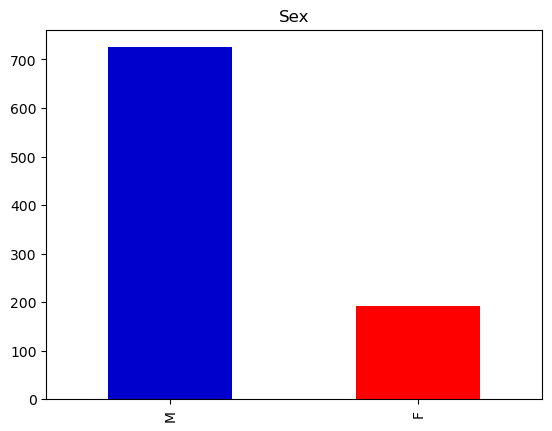

In [10]:
#Visualizando através de gráfico

df_origin.Sex.value_counts().plot(kind ='bar', title='Sex', color=['#0000cd','#ff0000' ])

In [11]:
#Quantidade de observações por Tipo de Dor Toráxica
df_origin.groupby(['ChestPainType']).size()

ChestPainType
ASY    496
ATA    173
NAP    203
TA      46
dtype: int64

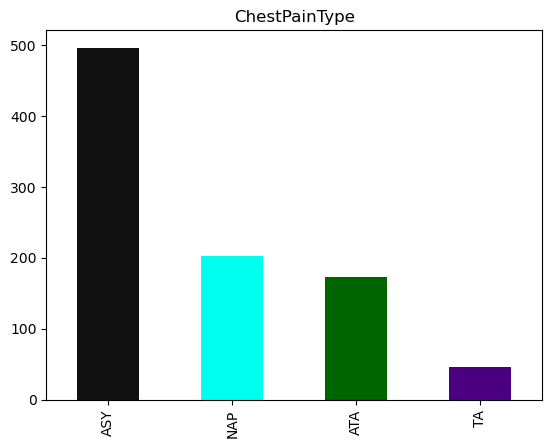

In [12]:
#Visualizando através do gráfico
df_origin.ChestPainType.value_counts().plot(kind='bar', title='ChestPainType', color =['#111111', '#00ffee', '#006400','#4B0082']);

In [13]:
#Quantidade de observações por Glicemia e Jejum
df_origin.groupby(['FastingBS']).size()

FastingBS
0    704
1    214
dtype: int64

<Axes: title={'center': 'FastingBS'}>

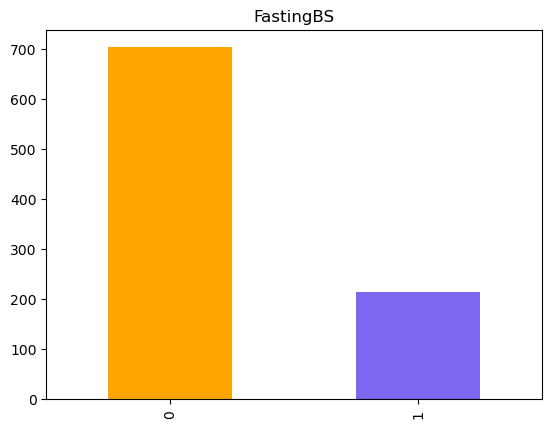

In [14]:
#Visualizando através do gráfico
df_origin.FastingBS.value_counts().plot(kind='bar', title='FastingBS', color =['#FFA500','#7B68EE'])

In [15]:
#Quantidade de observações por Tipo de Dor Toráxica
df_origin.groupby(['RestingECG']).size()

RestingECG
LVH       188
Normal    552
ST        178
dtype: int64

<Axes: title={'center': 'RestingECG'}>

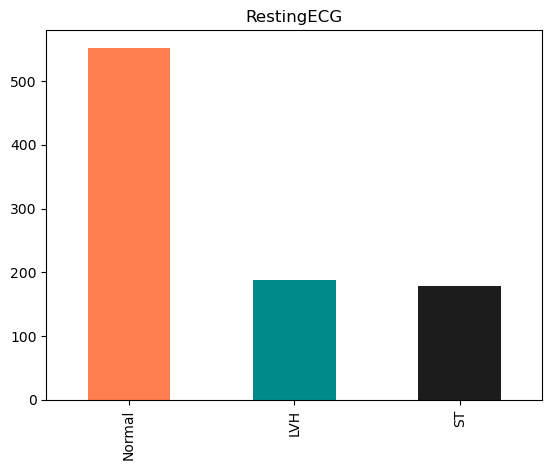

In [16]:
#Visualizando através do gráfico
df_origin.RestingECG.value_counts().plot(kind='bar',title='RestingECG', color= ['#FF7F50','#008B8B', '#1C1C1C'])

In [17]:
#Quantidade de observações por Angina Induzida
df_origin.groupby(['ExerciseAngina']).size()

ExerciseAngina
N    547
Y    371
dtype: int64

<Axes: title={'center': 'ExerciseAngina'}>

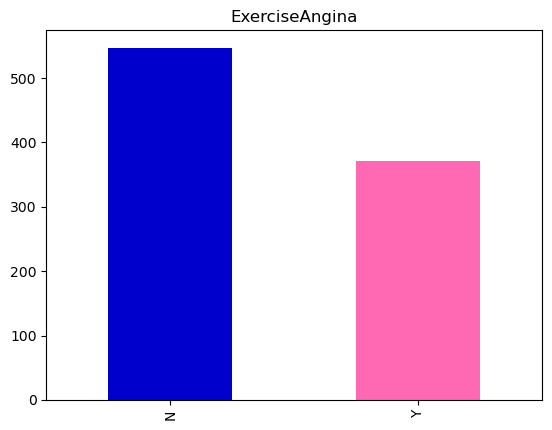

In [18]:
#Visualizando através do gráfico
df_origin.ExerciseAngina.value_counts().plot(kind='bar', title='ExerciseAngina', color = ['#0000CD', '#FF69B4'])

In [19]:
#Quantidade de observações Inclinação por Pico Exercicio
df_origin.groupby(['ST_Slope']).size()

ST_Slope
Down     63
Flat    460
Up      395
dtype: int64

<Axes: title={'center': 'ST_Slope'}>

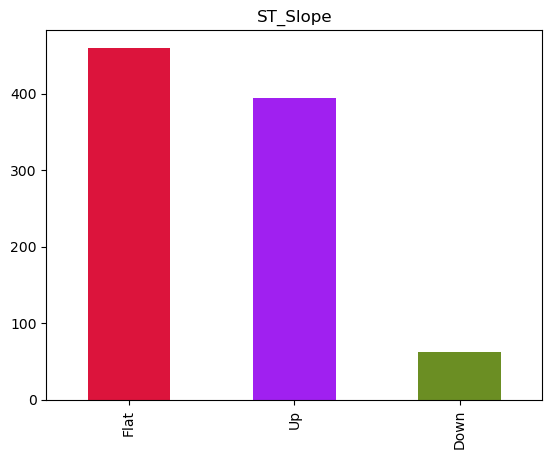

In [20]:
#Visualizando através do gráfico
df_origin.ST_Slope.value_counts().plot(kind='bar', title='ST_Slope', color= ['#DC143C', '#A020F0', '#6B8E23'])

In [21]:
#Quantidade de observações Doença Cardiaca (Variável TARGET)
df_origin.groupby(['HeartDisease']).size()

HeartDisease
0    410
1    508
dtype: int64

<Axes: title={'center': 'HeartDisease'}>

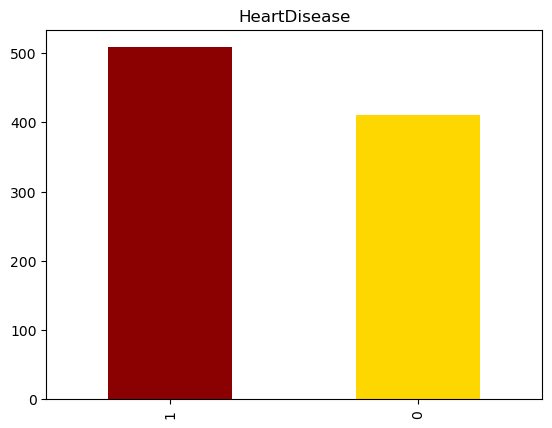

In [22]:
#Visualizando através do gráfico
df_origin.HeartDisease.value_counts().plot(kind='bar', title='HeartDisease', color = ['#8B0000', '#FFD700'])

## Analisando variáveis categóricas em relação a variável alvo

In [23]:
#Formatando o tamanho do Plot
plt.rcParams['figure.figsize'] = [8.00, 4.00]
plt.rcParams['figure.autolayout'] = True

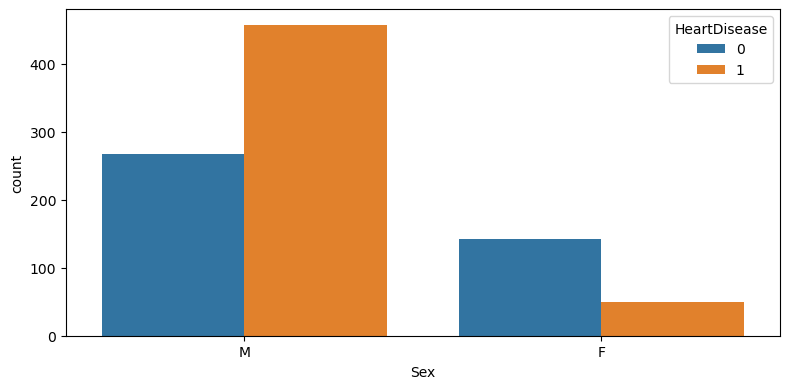

In [24]:
#Visualizando a variávei Sex x HeartDisease
sns.countplot(data = df_origin, x = 'Sex', hue= 'HeartDisease')
plt.show()

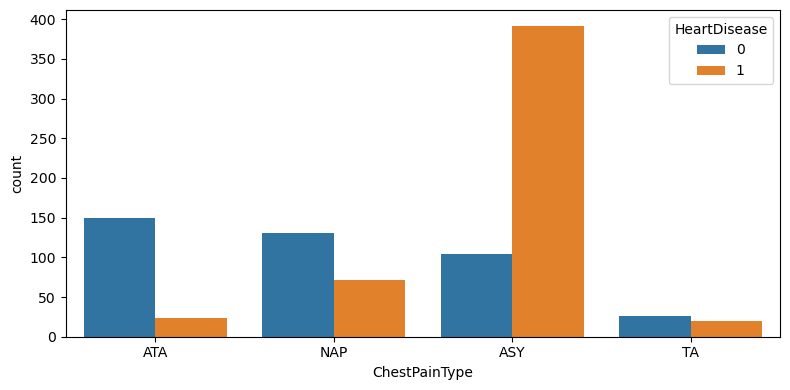

In [25]:
#Visualizando a Variável ChestPainType x HeartDisease
sns.countplot(data = df_origin, x = 'ChestPainType', hue='HeartDisease')
plt.show()

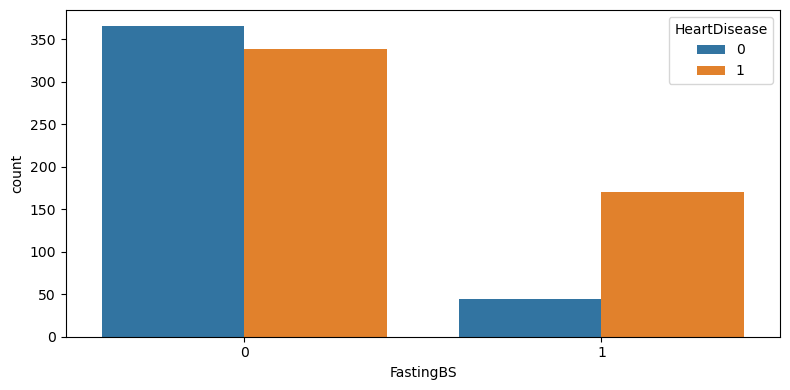

In [26]:
#Visualizando variável FastingBS x HeartDisease
sns.countplot(data= df_origin, x ='FastingBS', hue='HeartDisease')
plt.show()

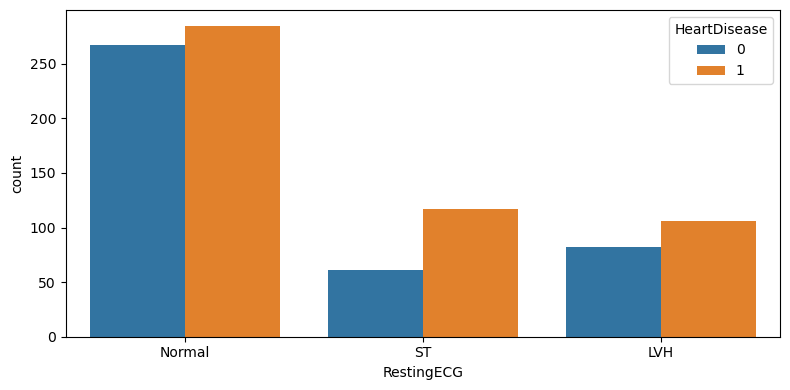

In [27]:
#Visualizando variável RestingECG x HeartDisease
sns.countplot(data= df_origin, x ='RestingECG', hue='HeartDisease')
plt.show()

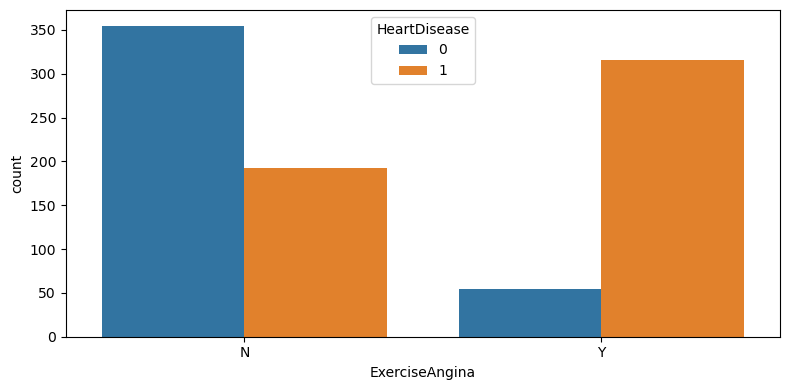

In [28]:
#Visualizando a variável ExerciseAngina x HeartDisease
sns.countplot(data =df_origin, x='ExerciseAngina', hue='HeartDisease')
plt.show()

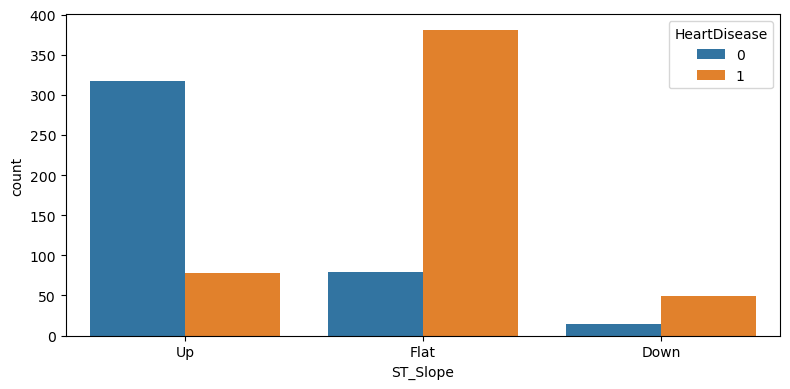

In [29]:
#Visualizando a variável ST_Slope x HeatDisease
sns.countplot(data= df_origin, x='ST_Slope', hue='HeartDisease')
plt.show()

In [30]:
#Convertendo as variáveis do tipo Objeto para variáveis categóricas
df_origin['Sex'] = df_origin['Sex'].astype('category')
df_origin['ChestPainType'] = df_origin['ChestPainType'].astype('category')
df_origin['RestingECG'] = df_origin['RestingECG'].astype('category')
df_origin['ExerciseAngina'] = df_origin['ExerciseAngina'].astype('category')
df_origin['ST_Slope'] = df_origin['ST_Slope'].astype('category')
df_origin['FastingBS'] = df_origin['FastingBS'].astype('category')

In [31]:
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             918 non-null    int64   
 1   Sex             918 non-null    category
 2   ChestPainType   918 non-null    category
 3   RestingBP       918 non-null    int64   
 4   Cholesterol     918 non-null    int64   
 5   FastingBS       918 non-null    category
 6   RestingECG      918 non-null    category
 7   MaxHR           918 non-null    int64   
 8   ExerciseAngina  918 non-null    category
 9   Oldpeak         918 non-null    float64 
 10  ST_Slope        918 non-null    category
 11  HeartDisease    918 non-null    int64   
dtypes: category(6), float64(1), int64(5)
memory usage: 49.4 KB


In [32]:
#Carregar variáveis para plot
variaveis_num = []
for i in df_origin.columns[0:11].tolist():
    if df_origin.dtypes[i] =='int64' or df_origin.dtypes[i]=='float64':
        variaveis_num.append(i)

In [33]:
variaveis_num

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [34]:
len(variaveis_num)

5

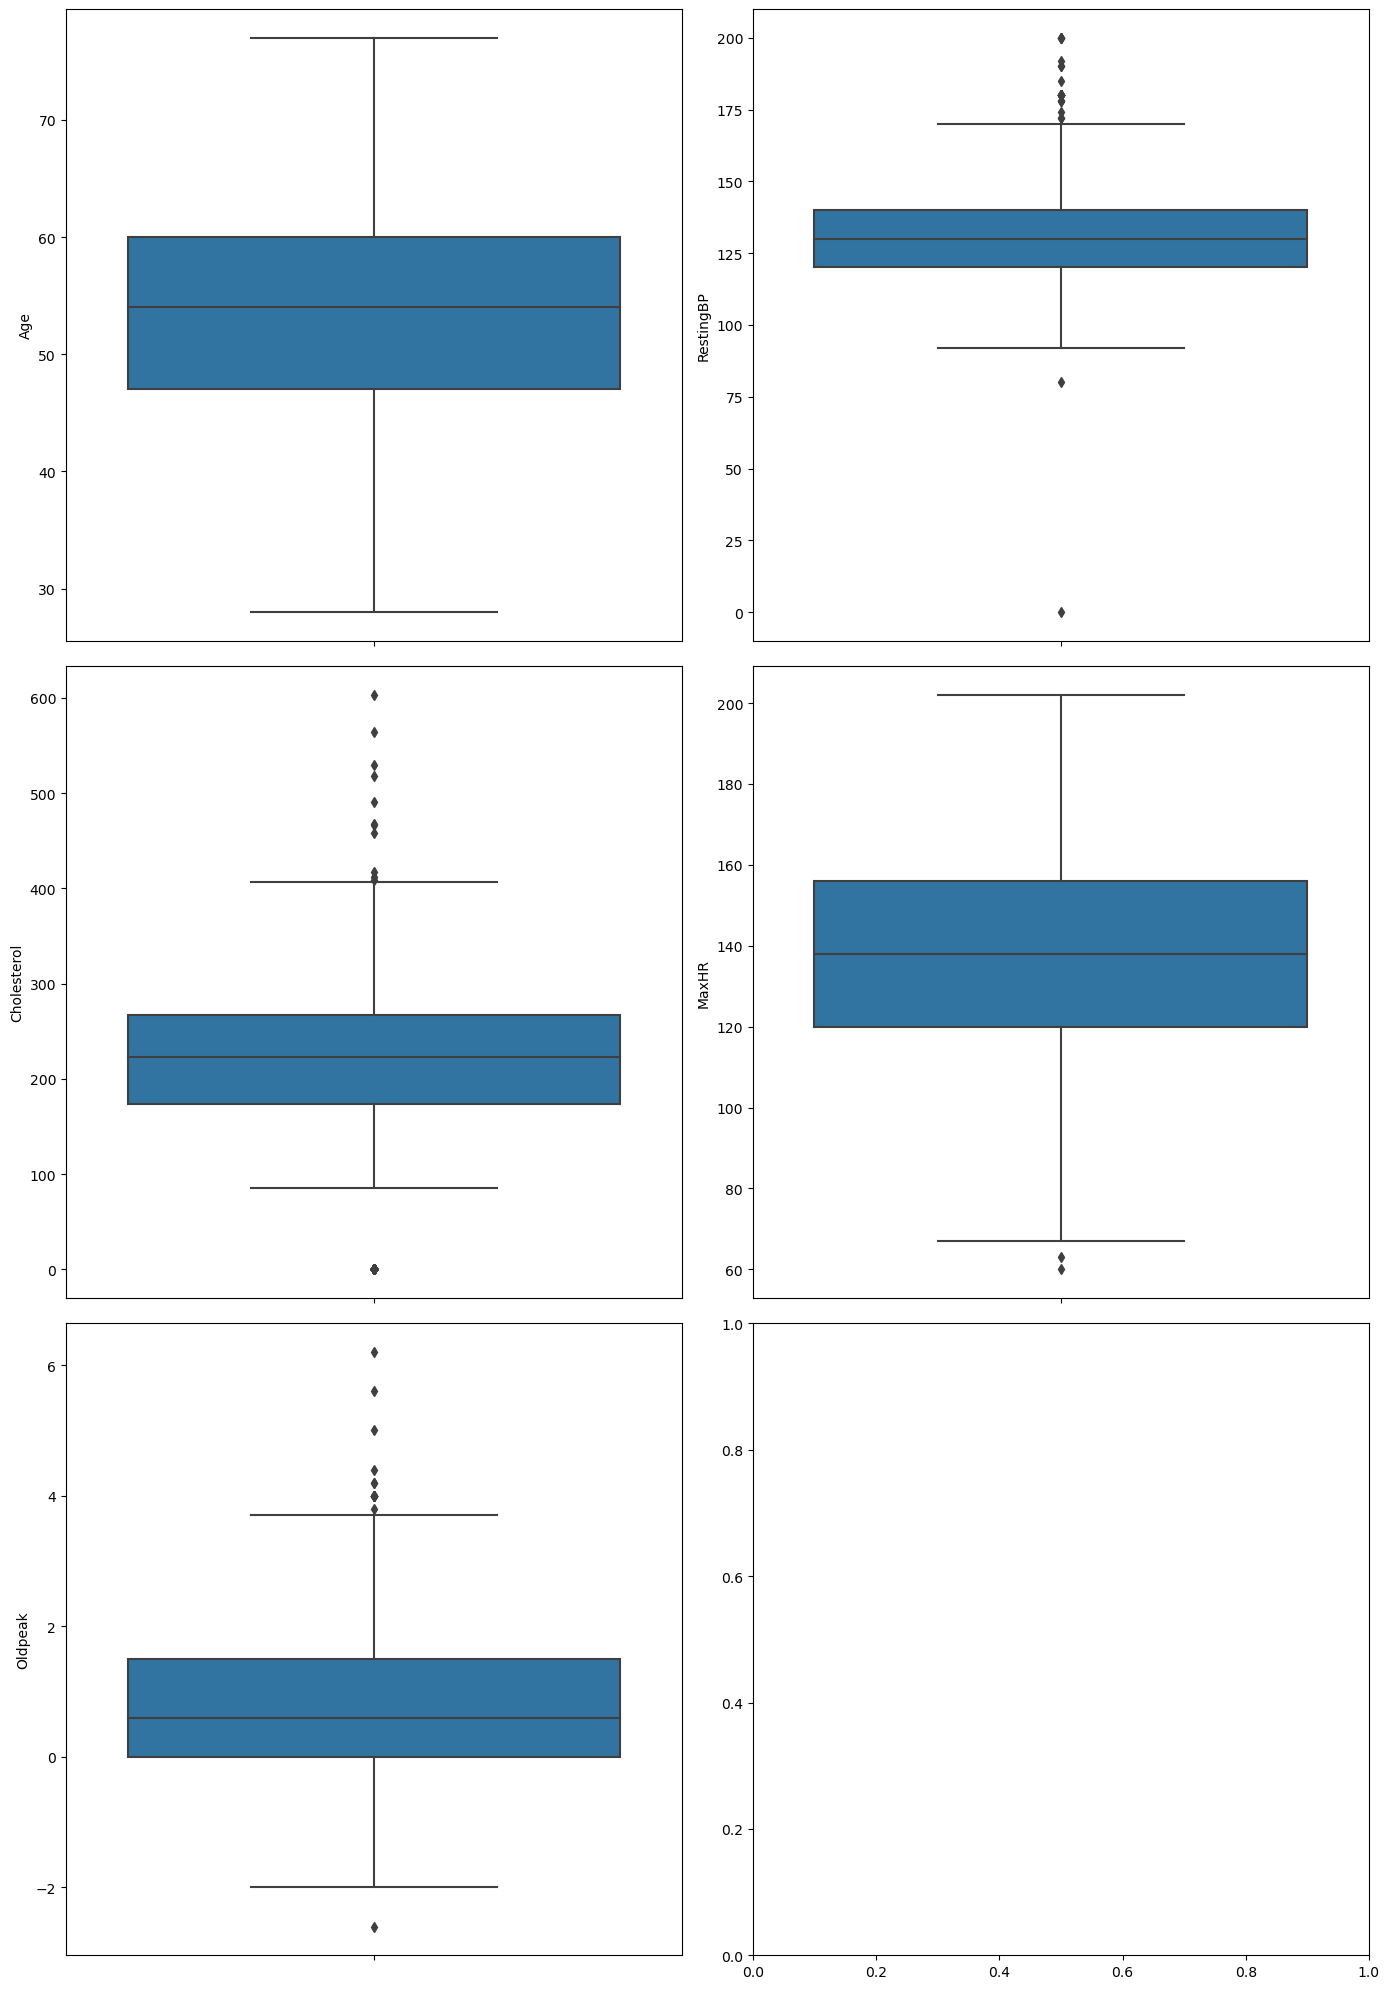

In [35]:
#Podemos observar nos boxplots abaixo que as variáveis numéricas apresentam uma grande quantidade de "possíveis" outliers
#Precisamos avaliar cada uma dessas variáveis dentro do contexto dos dados para saber se realmenteiremos trata-las como outlier

plt.rcParams['figure.figsize']=[14.00, 20.00]
plt.rcParams['figure.autolayout']=True
f, axes = plt.subplots(3,2) #3 linhas e 2 colunas

linha = 0
coluna = 0
for i in variaveis_num:
    sns.boxplot(data=df_origin, y=i, ax= axes[linha][coluna])
    coluna +=1
    if coluna ==2:
        linha+=1
        coluna = 0
        
plt.show()


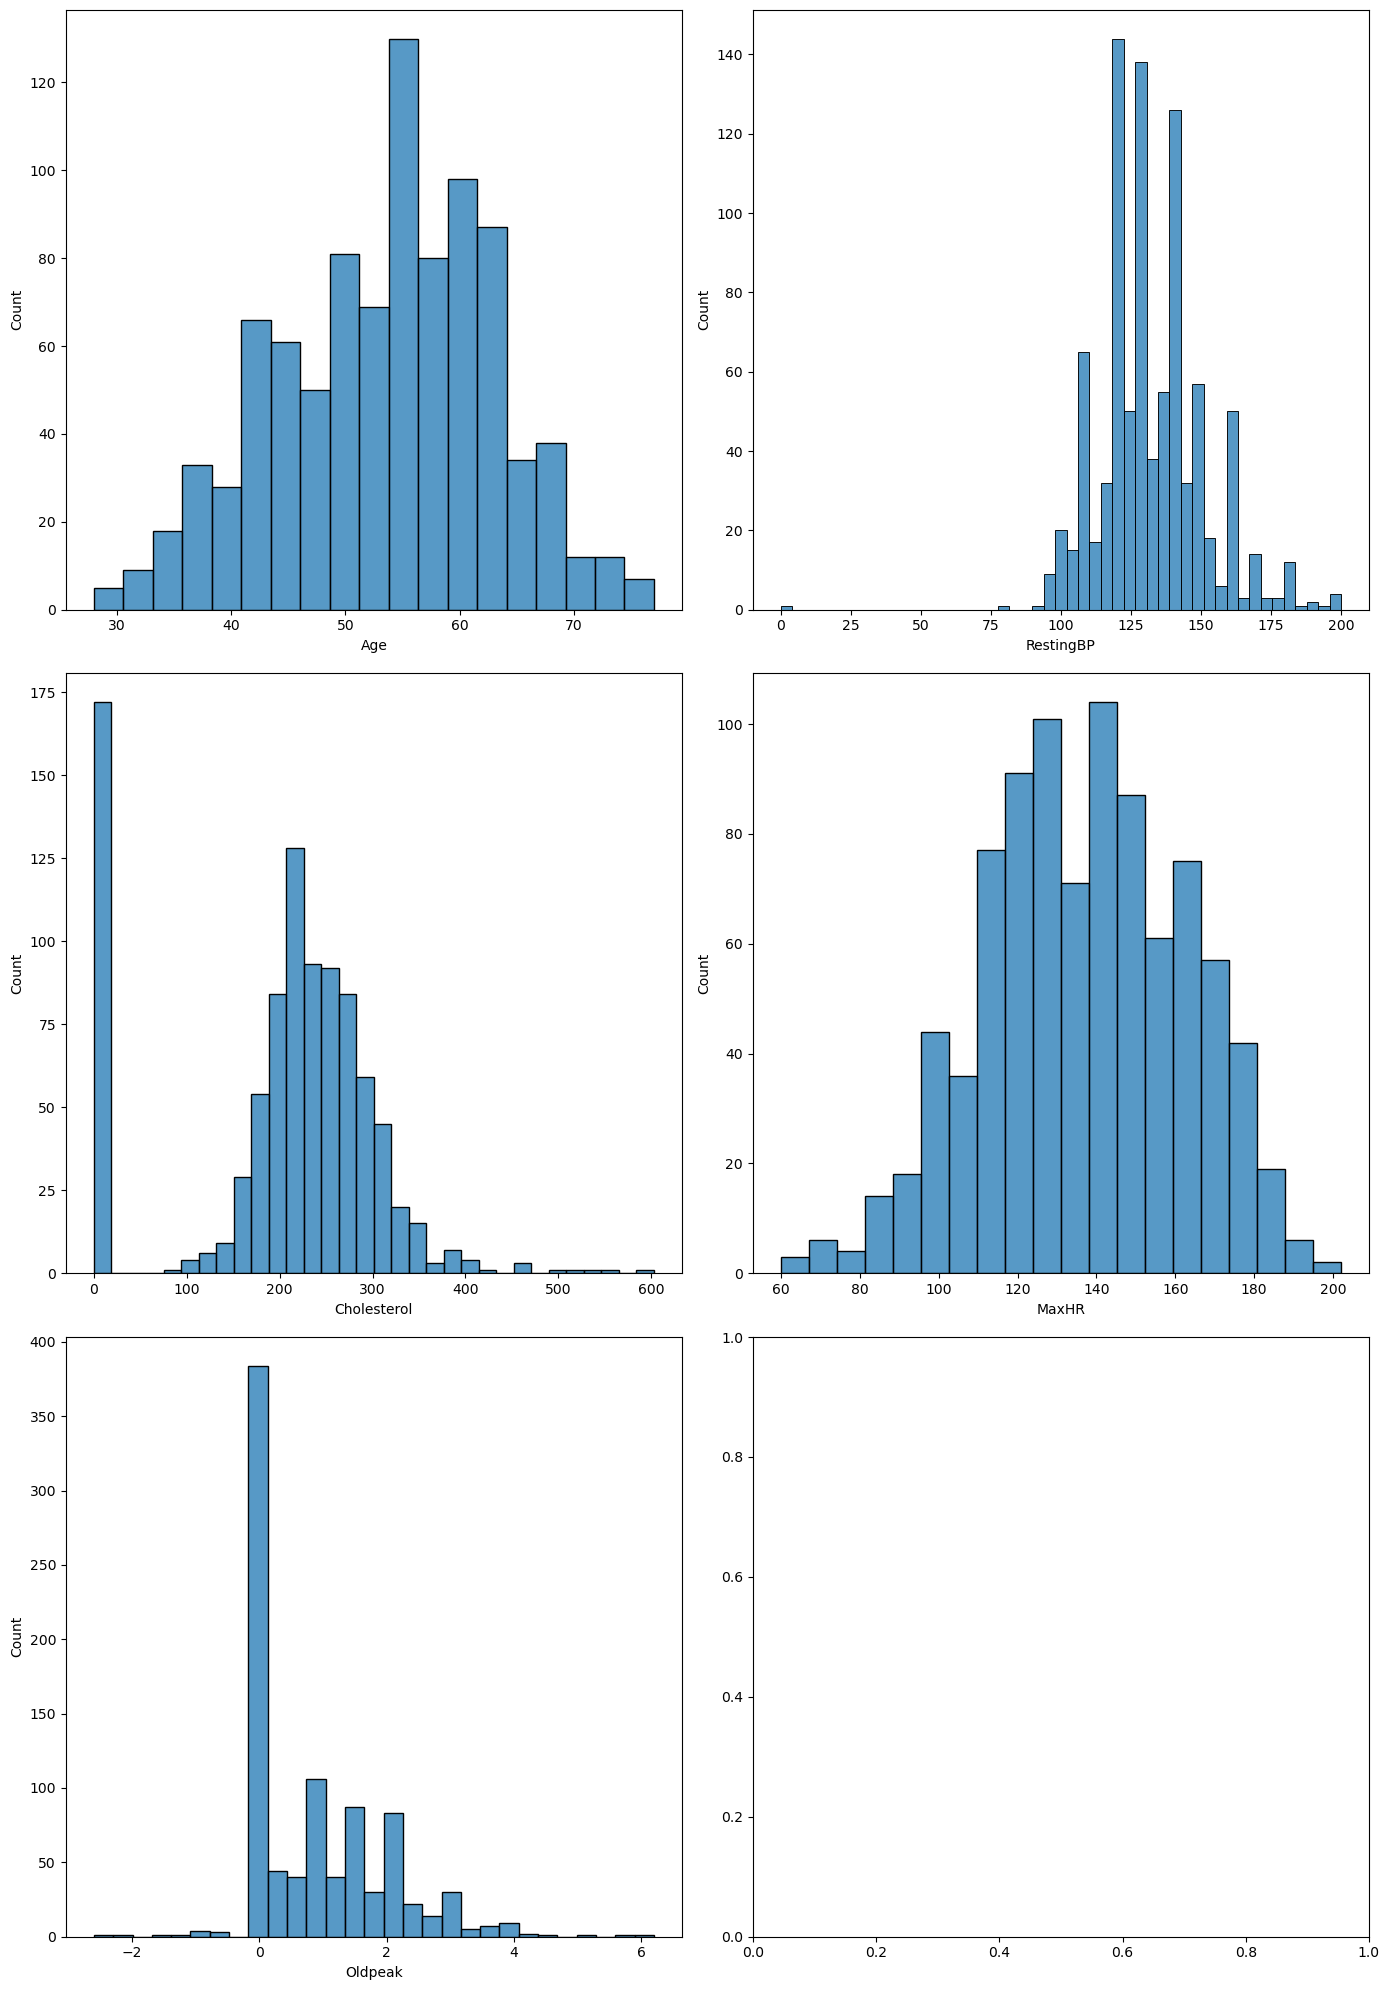

In [36]:
#Podemos observar nos boxplots abaixo que as variáveis númericas apresentam uma grande quantidade de "possíveis" outliers
#Precisamos avaliar cada uma dessas variaveis dentro do contexto dos dados para saber se realmente iremos trata-las como outlier

plt.rcParams["figure.figsize"] = [14.00, 20.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(3, 2) #3 linhas e 2 colunas

linha = 0
coluna = 0
for i in variaveis_num:
    sns.histplot(data = df_origin, x=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0            

plt.show()

In [37]:
#Carregar variáveis categóricas para OneotEnconding
#Vamos colocar o slice somente até a coluna de indice 18 para não pegar a variável Target

variaveis_cat = []
for i in df_origin.columns[0:11].tolist():
    if df_origin.dtypes[i]=='object' or df_origin.dtypes[i] =='category':
        variaveis_cat.append(i)

In [38]:
#Visualizando variáveis Categóricas
variaveis_cat

['Sex',
 'ChestPainType',
 'FastingBS',
 'RestingECG',
 'ExerciseAngina',
 'ST_Slope']

In [39]:
#Cria o encoder e aplica o OneHotEncoder
lb = LabelEncoder()

for var in variaveis_cat:
    df_origin[var] = lb.fit_transform(df_origin[var])

In [40]:
#Verifica novamente para confirmar se após a trsnformação surgiu algum valor nulo
df_origin.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [41]:
#Visualizando os tipos das variáveis
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int32  
 2   ChestPainType   918 non-null    int32  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int32  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int32  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int32  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int32(5), int64(6)
memory usage: 68.3 KB


In [42]:
df_origin.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.00,2,0
1,49,0,2,160,180,0,1,156,0,1.00,1,1
2,37,1,1,130,283,0,2,98,0,0.00,2,0
3,48,0,0,138,214,0,1,108,1,1.50,1,1
4,54,1,2,150,195,0,1,122,0,0.00,2,0


In [43]:
#Visualizando a quantidade da variável target para balanceamento
variavel_target = df_origin.HeartDisease.value_counts()
variavel_target

1    508
0    410
Name: HeartDisease, dtype: int64

In [44]:
#Separar variáveis preditoras e target
preditoras = df_origin.iloc[:, 0:11]
target = df_origin.iloc[:, 11]

In [45]:
#visualizando as variaveis preditoras
preditoras.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.00,2
1,49,0,2,160,180,0,1,156,0,1.00,1
2,37,1,1,130,283,0,2,98,0,0.00,2
3,48,0,0,138,214,0,1,108,1,1.50,1
4,54,1,2,150,195,0,1,122,0,0.00,2


In [46]:
#Visualiando variaveis target
target.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [47]:
#Seed para reproduzir o mesmo resultado
seed= 100

#Cria balanceamento SMOTE
balanceador = SMOTE(random_state = seed)

#Aplicar balanceador
preditoras_res, target_res = balanceador.fit_resample(preditoras, target)

<Axes: title={'center': 'Doença Cardiaca'}>

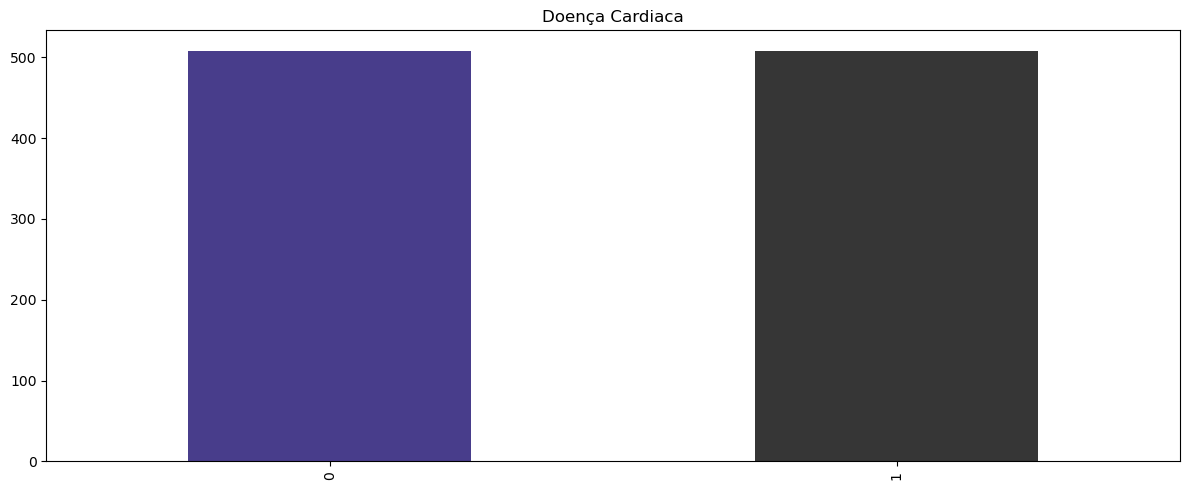

In [48]:
#Visualizando o balanceamento da variavel target
plt.rcParams['figure.figsize'] = [12.00, 5.00]
plt.rcParams['figure.autolayout'] = True
target_res.value_counts().plot(kind='bar', title='Doença Cardiaca', color = ['#483D8B', '#363636'])

In [49]:
#Visualizando a quantidade de variável target para balanceamento
variavel_target = target_res.value_counts()
variavel_target

0    508
1    508
Name: HeartDisease, dtype: int64

In [50]:
#Quantidade de registros antes do balanceamento
preditoras.shape

(918, 11)

In [51]:
#Quantidade de registros antes do balanceamento
target.shape

(918,)

In [52]:
#Quantidade de registros após o balanceamento
preditoras_res.shape

(1016, 11)

In [53]:
#Quantidade de registros após o balanceamento
target_res.shape

(1016,)

## Agora vamos dividir os dados em dados de treino e teste para iniciarmos a etapa de criação do modelo

In [54]:
#Divisão em dados de Treino e Teste 
X_treino, X_teste, Y_treino, Y_teste = train_test_split(preditoras_res, target_res, test_size = 0.3, random_state =42 )

In [55]:
X_treino.shape

(711, 11)

In [56]:
X_treino.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
177,59,1,1,140,287,0,1,150,0,0.00,2
467,63,0,1,132,0,0,1,130,0,0.10,2
507,40,1,2,106,240,0,1,80,1,0.00,2
486,55,1,1,110,214,1,2,180,0,0.40,2
328,52,1,0,95,0,1,1,82,1,0.80,1


In [57]:
#Normalização das Variáveis
Normalizador = MinMaxScaler()
X_treino_normalizados = Normalizador.fit_transform(X_treino)
X_teste_normalizados = Normalizador.fit_transform(X_teste)

In [58]:
X_treino_normalizados.shape

(711, 11)

In [59]:
X_teste_normalizados.shape

(305, 11)

In [60]:
X_teste_normalizados

array([[0.12244898, 0.        , 0.33333333, ..., 0.        , 0.24657534,
        1.        ],
       [0.71428571, 1.        , 0.        , ..., 1.        , 0.28767123,
        1.        ],
       [0.40816327, 1.        , 0.        , ..., 0.        , 0.15068493,
        0.5       ],
       ...,
       [0.63265306, 1.        , 0.66666667, ..., 0.        , 0.36986301,
        1.        ],
       [0.59183673, 1.        , 0.33333333, ..., 0.        , 0.26027397,
        0.5       ],
       [0.40816327, 1.        , 0.66666667, ..., 0.        , 0.15068493,
        1.        ]])

## Criando, Treinando e Avaliando os Modelos de Machine Learning

In [62]:
# Criando o classificador com Random Forest
clf = RandomForestClassifier(n_estimators  = 300, criterion = 'entropy', max_depth = 10, 
                             max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 1.0, n_jobs = 8)

# Construção do modelo
clf = clf.fit(X_treino_normalizados, Y_treino)

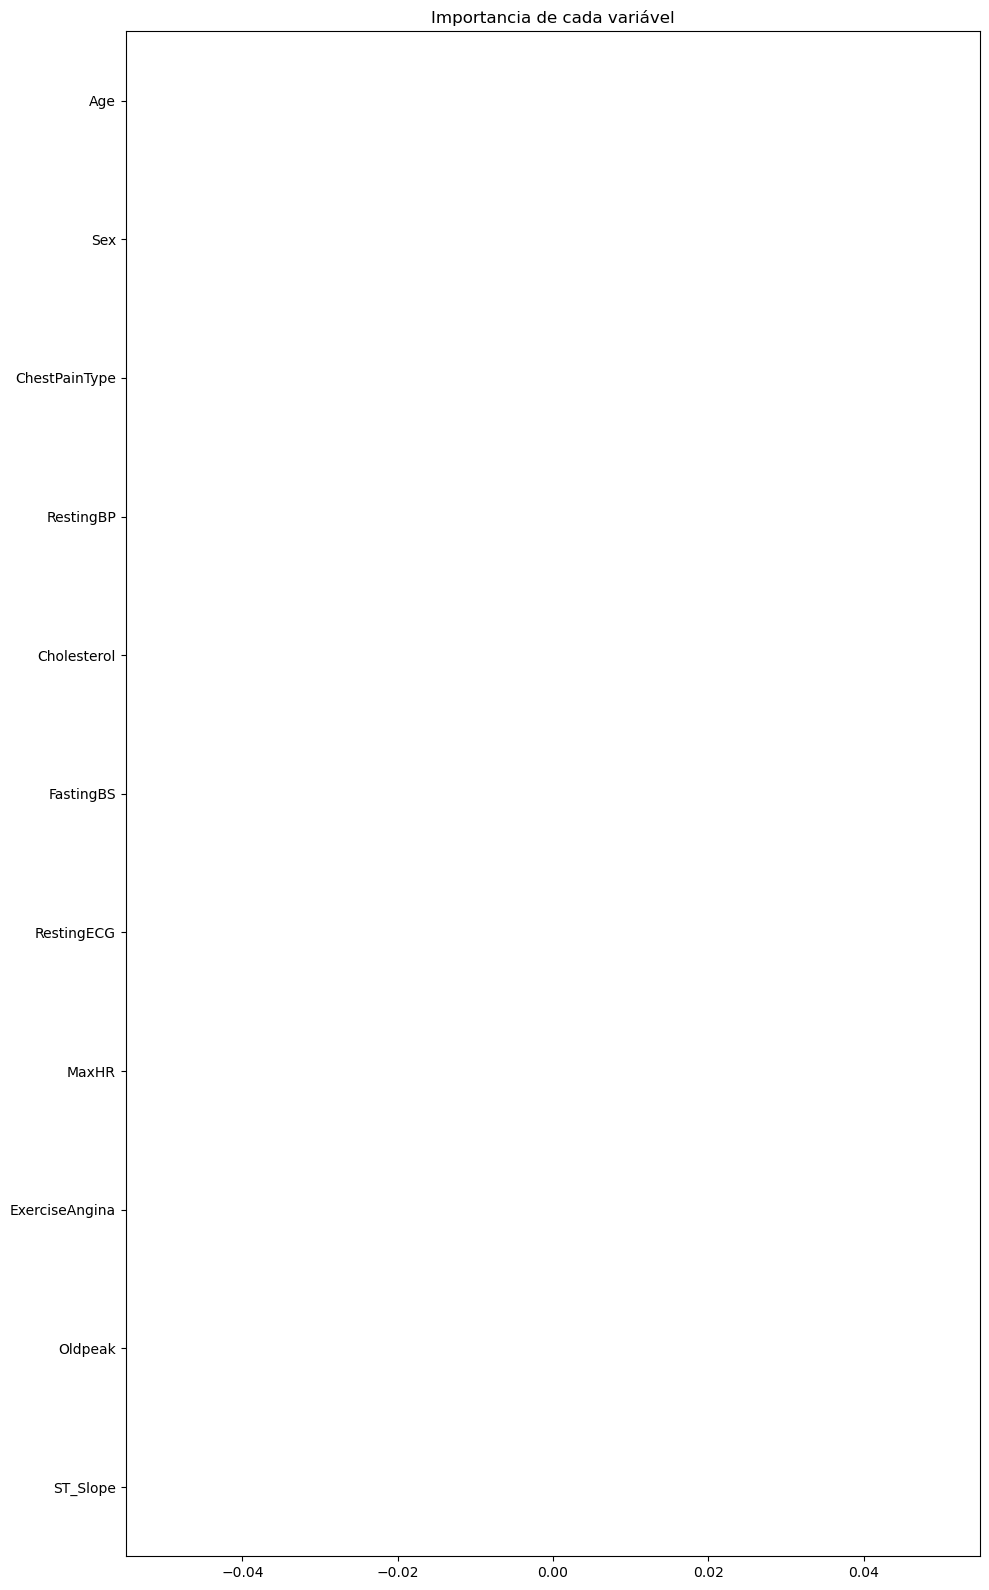

In [64]:
#Exibindo a importância de cada variável no modelo preditivo
plt.rcParams['figure.figsize'] = [10.00, 16.00]
plt.rcParams ['figure.autolayout'] = True

importances = pd.Series(data=clf.feature_importances_, index = preditoras.columns)
importances = importances.sort_values(ascending = False)
sns.barplot(x = importances, y = importances.index, orient = 'h').set_title('Importancia de cada variável')   
plt.show()

In [65]:
#Visualizando percentual de importância de cada variável
importances.sort_values(ascending = False)

Age              0.00
Sex              0.00
ChestPainType    0.00
RestingBP        0.00
Cholesterol      0.00
FastingBS        0.00
RestingECG       0.00
MaxHR            0.00
ExerciseAngina   0.00
Oldpeak          0.00
ST_Slope         0.00
dtype: float64

In [68]:
#Estamos apenas "simulando" os dados de Treino
scores = clf.score(X_treino_normalizados, Y_treino)
scores

0.5203938115330521

In [72]:
#Estamos apenas "simulando" os dados de Teste
scores =clf.score (X_teste_normalizados, Y_teste)
scores

0.4524590163934426

In [74]:
y_pred = clf.predict(X_teste_normalizados)
print(accuracy_score(Y_teste, y_pred) * 100)

45.24590163934426


In [75]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print(confusion_matrix(Y_teste, y_pred))

[[138   0]
 [167   0]]


In [76]:
from sklearn.metrics import classification_report
print(classification_report(Y_teste, y_pred))

              precision    recall  f1-score   support

           0       0.45      1.00      0.62       138
           1       0.00      0.00      0.00       167

    accuracy                           0.45       305
   macro avg       0.23      0.50      0.31       305
weighted avg       0.20      0.45      0.28       305



In [79]:
cm = confusion_matrix(Y_teste, y_pred)
print(cm)

[[138   0]
 [167   0]]


In [80]:
cm_disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels = ['Sim', 'Não'])

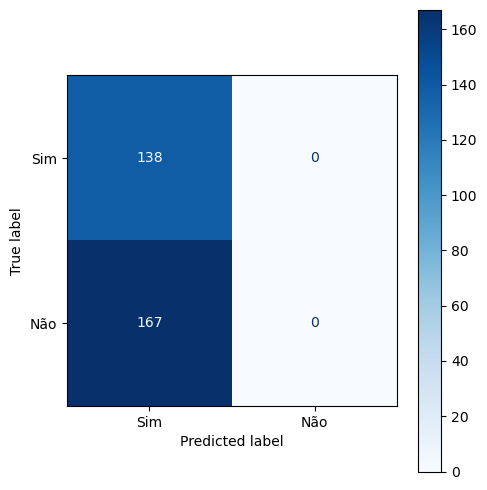

In [82]:
plt.rcParams['figure.figsize'] = [5.00, 5.00]
plt.rcParams['figure.autolayout'] = True
cm_disp.plot(include_values= True,
        cmap='Blues',
       colorbar = 'None')

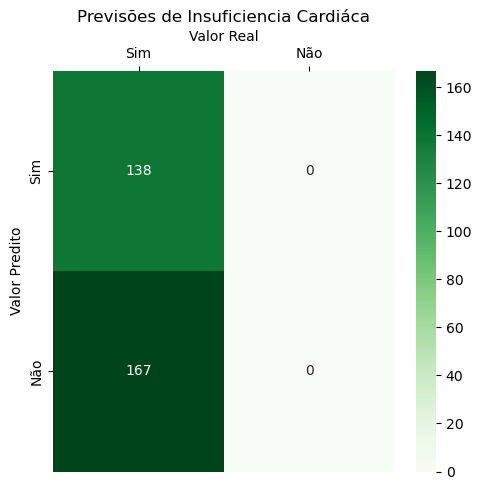

In [87]:
pd.options.display.float_format = '{:.2f}'.format

plt.rcParams["figure.figsize"] = [5.00, 5.00]
plt.rcParams["figure.autolayout"] = True

f, ax = plt.subplots(figsize=(5, 5))

sns.heatmap(cm, 
            cmap = "Greens", 
            annot = True,
            cbar_kws = {"orientation":"vertical"},            
            fmt=".0f",
            xticklabels = ["Sim","Não"],
            yticklabels = ["Sim","Não"])

ax.set_ylabel('Valor Predito')
ax.set_xlabel('Valor Real')

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title("Previsões de Insuficiencia Cardiáca")
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = True, labeltop=True)
plt.show()


In [88]:
122 + 148

270

In [89]:
270 / 305 * 100

88.52459016393442